In [1]:
# Exemplo de aplicação de uma regressão logística. A base de dados foi oferecida durante as atividades do curso de Data Science (Fernando Amaral e Jones Granatyr)
# Os dados detalham a relação do gasto da campanha e a situação de candidatos a eleição 
# O objetivo é criar um modelo para tentar prever a situação de um candidato em relação ao quanto gastou em sua campanha

In [2]:
# Import das bibliotecas que serão utilizadas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression

In [3]:
# Carrega a base de dados utilizando o pandas
base = pd.read_csv('Eleicao.csv', sep = ';')

In [4]:
# Rápida visualização para entender melhor como a base é organizada
base

,CANDIDATO,SITUACAO,DESPESAS
0,George Turner,0,10
1,Victor Johnson,0,100
2,Jerry Perry,1,1600
3,Shirley Cook,1,1500
4,Carolyn Bailey,1,3300
5,Susan Sanders,0,200
6,Anthony Harris,1,1800
7,Philip Richardson,1,1700
8,Eugene Phillips,0,300
9,Mildred Morris,1,1800


In [6]:
# Verificação se a base apresenta valores nulos
base.isna().sum()

CANDIDATO    0
SITUACAO     0
DESPESAS     0
dtype: int64

In [7]:
# Uso do describe para conhecer melhor os valores de cada coluna
# Mostra que situação apresenta uma respota binária (0 e 1) e detalha os valores de despesa da base de dados
base.describe()

,SITUACAO,DESPESAS
count,47.000000,47.000000
mean,0.510638,1085.744681
std,0.505291,870.968338
min,0.000000,10.000000
25%,0.000000,300.000000
50%,1.000000,800.000000
75%,1.000000,1700.000000
max,1.000000,3300.000000


Text(0.5, 1.0, 'Despesas X Situação')

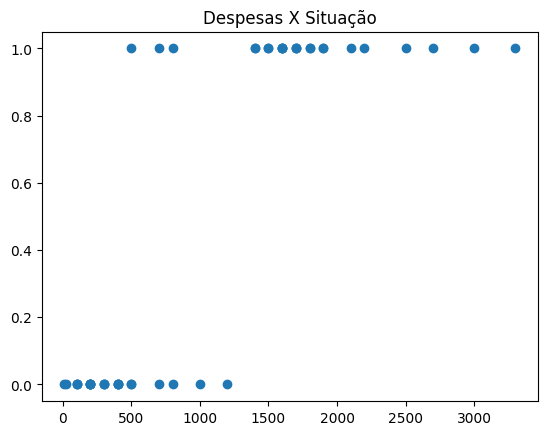

In [5]:
# Situação 0 - Não eleito 1 - Eleito
# A regressão logística é aplicada quando a variável dependente é categórica ou binária

# Para melhor compreensão, é feito um gráfico de dispersão
plt.scatter(base.DESPESAS, base.SITUACAO)
plt.title("Despesas X Situação")

In [9]:
# Correlação feita entre despesas e situção
corr = np.corrcoef(base.DESPESAS, base.SITUACAO)
corr

array([[1.        , 0.81218717],
       [0.81218717, 1.        ]])

In [10]:
# Criação das variávies x e y 
# X - Variável independente, valores das despesas
# Y - Variável dependente, situação dos candidatos
x = base['DESPESAS'].values
y = base['SITUACAO'].values

# Transformação de x para o formato de matriz
x = x.reshape(-1, 1) 

In [11]:
x

array([[  10],
       [ 100],
       [1600],
       [1500],
       [3300],
       [ 200],
       [1800],
       [1700],
       [ 300],
       [1800],
       [ 100],
       [ 500],
       [3000],
       [  20],
       [ 200],
       [ 700],
       [1600],
       [1900],
       [ 100],
       [ 400],
       [2700],
       [ 200],
       [ 300],
       [ 500],
       [2500],
       [1400],
       [ 700],
       [1700],
       [1400],
       [1600],
       [ 400],
       [ 200],
       [1600],
       [2200],
       [1900],
       [ 200],
       [1200],
       [1700],
       [1500],
       [2100],
       [ 400],
       [ 800],
       [ 400],
       [ 500],
       [1000],
       [ 300],
       [ 800]], dtype=int64)

In [12]:
# Criação do modelo
modelo = LogisticRegression()
# Treinamento do modelo a partir das variáveis x e y
modelo.fit(x, y)

LogisticRegression()

In [14]:
# Carrega novos dados (outros candidatos) para fazer novas previsões a partir do modelo
base_previsao = pd.read_csv('NovosCandidatos.csv', sep = ';')
base_previsao

,CANDIDATO,DESPESAS
0,A,0
1,B,10
2,C,200
3,D,500
4,E,900
5,F,1500
6,G,3000


In [18]:
# Armazena novos valores para x e transforma o mesmo em uma matriz
previsao_despesas = base_previsao['DESPESAS'].values
previsao_despesas = previsao_despesas.reshape(-1, 1)

In [19]:
# Previsões a partir dos valores de x
previsoes_teste = modelo.predict(previsao_despesas)

In [23]:
# Adiciona uma nova coluna onde é armazenado os valores das previsões
base_previsao['Previsão'] = previsoes_teste

In [24]:
base_previsao

,CANDIDATO,DESPESAS,Previsão
0,A,0,0
1,B,10,0
2,C,200,0
3,D,500,0
4,E,900,0
5,F,1500,1
6,G,3000,1
